<a href="https://colab.research.google.com/github/LordLean/Acquired-Intelligence-Adaptive-Behaviour/blob/master/AIAB_Labs/hillclimber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [0]:
# (benefit, cost)
knapsack = [(5,3),(6,2),(1,4),(9,5),(2,8),(8,9),(4,10),(3,1),(7,6),(10,7)]
config = {"kp":knapsack, "capacity": 20}

In [0]:
class HillClimber(object):
  

  def __init__(self, kp, capacity, generations=100, mutation_rate=0.3):
    self.kp = kp # Knapsack to be evaluated.
    self.generations = generations # Evolutions to mutate for. 
    self.mutation_rate = mutation_rate # Mutation rate to effect rate of evolution.
    self.capacity = capacity # Knapsack capacity.
    self.shape = len(self.kp) # Shape of desired genotype.
    self.genotype = np.zeros(self.shape, dtype=int) # Store the current optimal working genotype for this HC.
    self.fitness_values = list() # Hold fitness values across evolutions for graphical representation.


  def initalize(self, print_results=False):
    # Enter while loop:
    current_sum = self.capacity + 1
    # Ensure random values do not cause a cost above capacity.
    while current_sum > self.capacity:
      for i, _ in enumerate(self.genotype):
        num = random.uniform(0,1)  
        self.genotype[i] = np.round(num)
        # Update current sum until it holds a value less than capacity.
        current_sum =  np.sum([self.kp[i][1] * self.genotype[i] for i, _ in enumerate(self.kp)])
    if print_results:
      # Inital Results of this HillClimber :
      initial_bene = np.sum([self.kp[i][0] * self.genotype[i] for i, _ in enumerate(self.kp)])
      initial_cost = np.sum([self.kp[i][1] * self.genotype[i] for i, _ in enumerate(self.kp)])  
      print("Initial Benefit: {} \nInitial Cost: {}".format(initial_bene,initial_cost))


  def mutate(self):
    # Declare variable to hold mutated genotype
    mutated_genotype = np.zeros(self.shape, dtype=int)
    # Setup: while loop.
    current_sum = self.capacity + 1
    # Values will be reassigned until the mutated genotype cost is below capacity.
    while current_sum > self.capacity:
      # Copy genotype to temporary genotype.
      mutated_genotype = np.copy(self.genotype)
      for i, _ in enumerate(mutated_genotype):
        num = random.uniform(0,1)  
        # Allow mutation rate to reassign values.
        if num < self.mutation_rate:
          # If "on" switch off.
          if mutated_genotype[i]:
            mutated_genotype[i] = 0
          # If "off" switch on.
          else:
            mutated_genotype[i] = 1
      # Update current sum for the while loop to evaluate.
      current_sum =  np.sum([self.kp[i][1] * mutated_genotype[i] for i, _ in enumerate(self.kp)])
    # Return mutated genotype to be used for comparison.
    return mutated_genotype


  def fitness(self, parent_geno, child_geno):
    # Parent benefit-cost evaluation.
    parent_bene = np.sum([self.kp[i][0] * parent_geno[i] for i, _ in enumerate(self.kp)])
    parent_cost = np.sum([self.kp[i][1] * parent_geno[i] for i, _ in enumerate(self.kp)])
    # Child benefit-cost evaluation.
    child_bene = np.sum([self.kp[i][0] * child_geno[i] for i, _ in enumerate(self.kp)])
    child_cost = np.sum([self.kp[i][1] * child_geno[i] for i, _ in enumerate(self.kp)])
    # Case: benefits are equal, cost is evaluated.
    # Will not occur as values are positive however adds functionality if needs arise.
    if parent_bene == child_bene:
      if parent_cost <= child_cost:
        return parent_geno
      else:
        return child_geno
    # If original genotype has a greater benefit then that genotype is returned.
    elif parent_bene > child_bene:
      return parent_geno
    # If original genotype has a lesser benefit then that mutated genotype is returned.
    else:
      return child_geno


  def evolve(self, print_results=False, final_benefit=False):
    # Create inital genotype.
    self.initalize(print_results)
    # Counter to track generation.
    counter = 0
    while counter < self.generations:
      counter += 1
      # Mutate genotype.
      child_geno = self.mutate()
      # Compare fitness of parent vs child.
      self.genotype = self.fitness(self.genotype, child_geno)
      # Below can be moved into one of the conditionals to save running time.
      # Final benefit value to append to fitness list.
      final_bene = np.sum([self.kp[i][0] * self.genotype[i] for i, _ in enumerate(self.kp)])
      # Tuples of current epoch and successful genotype's total benefit.
      self.fitness_values.append((counter, final_bene))
    # Following two conditionals are for displaying results.
    if print_results:
      # Final Results of this HillClimber:
      final_cost = np.sum([self.kp[i][1] * self.genotype[i] for i, _ in enumerate(self.kp)])  
      print("Final Benefit: {} \nFinal Cost: {}".format(final_bene,final_cost)) 
    if final_benefit:
      return self.genotype, final_bene
    return self.genotype


In [152]:
# Demonstrate the various possibilities of results in binary genotype.
hc = HillClimber(knapsack,20,generations=100,mutation_rate=0.5)
print(hc.genotype)
hc.initalize()
print(hc.genotype)
print(hc.mutate())

[0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 0 0 1 0 1]
[1 1 0 0 1 0 0 1 0 0]


In [154]:
# Initalizes a new genotype then carries out its evolution.
hc.evolve(print_results=True,final_benefit=True)

Initial Benefit: 19 
Initial Cost: 12
Final Benefit: 31 
Final Cost: 19


(array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1]), 31)

In [0]:
def run_HCs(kp, capacity, gens=100, mutation_rate=0.3, instances=100):
  avg_y = list()
  for _ in range(instances):
    data_x = list()
    data_y = list()
    h_c = HillClimber(kp, capacity, gens, mutation_rate)
    h_c.evolve()
    for x in range(gens):
      y = h_c.fitness_values[x][1]
      data_x.append(x)
      data_y.append(y)
    plt.plot(data_x,data_y)
    # Recieve values for averaging.
    avg_y.append(data_y)
  plt.xlabel("Generations")
  plt.ylabel("Fitness: Benefit")
  plt.show()
  # Sum corresponding indicies and div by instances for mean benefit across each generation.
  avg_y = [sum(row[i] for row in avg_y) / instances for i in range(len(avg_y[0]))]
  plt.plot(data_x,avg_y,label=("Max Mean Value: {}".format(avg_y[-1])))
  plt.xlabel("Generations")
  plt.ylabel("Average Fitness: Benefit")
  plt.legend(loc="center right")
  plt.show()
  

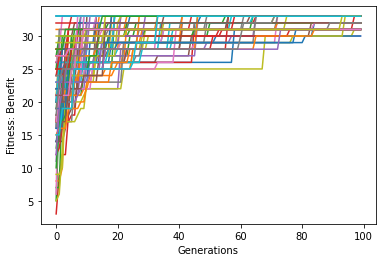

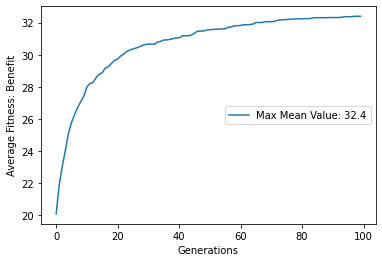

In [186]:
run_HCs(config["kp"],config["capacity"],gens=100, instances=100)


Mutation rate: 0.1


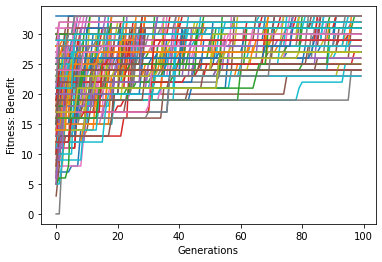

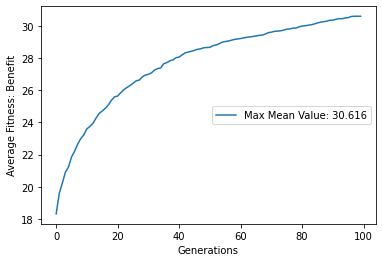



Mutation rate: 0.3


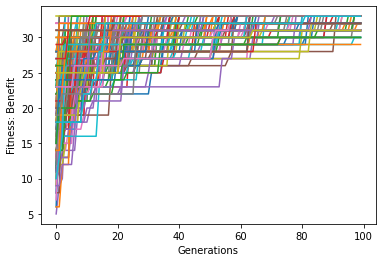

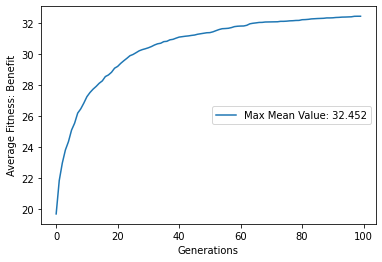



Mutation rate: 0.5


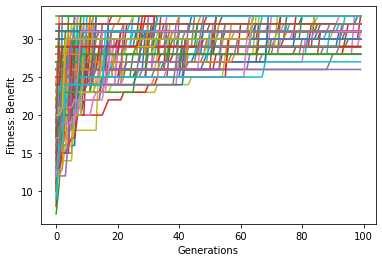

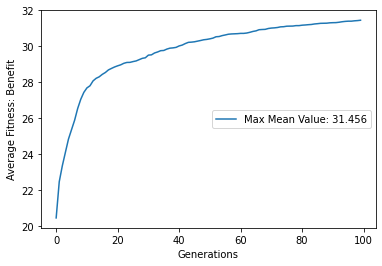



Mutation rate: 0.7


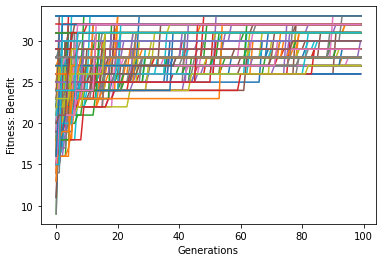

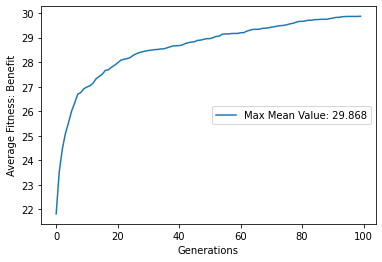



Mutation rate: 0.9


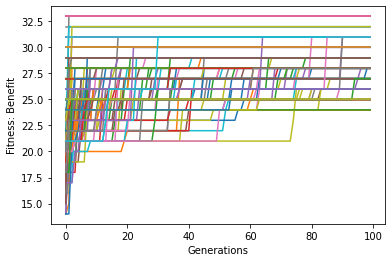

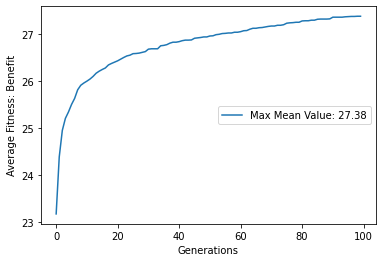

In [194]:
for val in np.arange(0.1,1,0.2):
  print()
  val = round(val,1)
  print("Mutation rate: {}".format(val))
  run_HCs(config["kp"],config["capacity"],gens=100, mutation_rate=val, instances=250)
  print()

In [242]:
np.arange(0.1,1,0.2)
np.geomspace(10,10000, num=4)

epoch_var = np.geomspace(10,10000, num=4)
mutation_rate_var = np.arange(0.1,1,0.2)
for epch in epoch_var:
  print(epch)
  for x in range(10):
    #print("Current Epoch: {}  Current Mutation Rate: {}".format(epch,"0.3"))
    hc = HillClimber(knapsack, 20, epochs=epch, mutation_rate=0.3)
    print(hc.evolve(final_benefit=True))
    #print()

10.0
(array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0]), 23)
(array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1]), 27)
(array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0]), 17)
(array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0]), 12)
(array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0]), 22)
(array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0]), 17)
(array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0]), 17)
(array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0]), 31)
(array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0]), 26)
(array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0]), 17)
100.0
(array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1]), 21)
(array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0]), 21)
(array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1]), 27)
(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), 25)
(array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1]), 27)
(array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0]), 19)
(array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0]), 21)
(array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1]), 25)
(array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0]), 25)
(array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0]), 21)
1000.0
(array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1]), 16)
(array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1]), 32)
(array([0, 0, 

In [257]:
# Leave to run
import time
start_time = time.time()

epoch_var = np.geomspace(10,10000, num=4)
#mutation_rate_var = np.arange(0.1,1,0.2)

storage = list()
for epch in epoch_var:
  for x in range(10):
    hc = HillClimber(knapsack, 20, generations=epch, mutation_rate=0.3)
    storage.append(hc.evolve(final_benefit=True)[1])

print("%s seconds" % (time.time() - start_time))
print(max(storage))

24.17525053024292 seconds
33


In [260]:
# Leave to run - MK_2
import time
start_time = time.time()

#epoch_var = np.geomspace(10,10000, num=4)
#mutation_rate_var = np.arange(0.1,1,0.2)

# for epch in epoch_var:

storage = list()
for x in range(10000):
  hc = HillClimber(knapsack, 20, generations=1000, mutation_rate=0.3)
  storage.append(hc.evolve(final_benefit=True)[1])

print("%s seconds" % (time.time() - start_time))
print(max(storage))

2177.6525163650513 seconds
33
